# Gender Detection Model

In [1]:
import pandas as pd #importing pandas library to read data

In [26]:
data = pd.read_csv(r'C:/Users/aakarsh.jaiswal/Downloads/Indian_Names.csv') #read csv file
data.head(20) 

,Name,Gender
0,barjraj,0
1,ramdin verma,0
2,sharat chandran,0
3,birender mandal,0
4,amit,0
5,kushal,0
6,kasid,0
7,shiv prakash,0
8,vikram singh,0
9,sanjay,0


In [3]:
data['Gender'].describe()

count    30054.000000
mean         0.508352
std          0.499939
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Gender, dtype: float64

<AxesSubplot:>

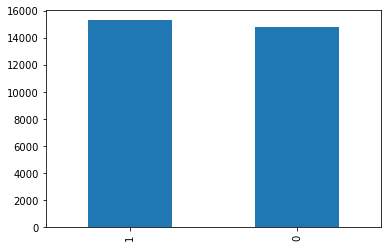

In [4]:
pd.value_counts(data['Gender']).plot.bar()

In [5]:
len(data)

30054

In [6]:
len(data.columns)

2

In [7]:
print(data['Gender'].value_counts())

1    15278
0    14776
Name: Gender, dtype: int64


### Converting names to lower case

In [8]:
names=data['Name']
names=names.apply(lambda X:X.lower())
names.head(10)

0            barjraj
1       ramdin verma
2    sharat chandran
3    birender mandal
4               amit
5             kushal
6              kasid
7       shiv prakash
8       vikram singh
9             sanjay
Name: Name, dtype: object

### Removing spaces between first name and last name

In [9]:
names=names.apply(lambda X:X.replace(' ',""))
names.head(10)

0           barjraj
1       ramdinverma
2    sharatchandran
3    birendermandal
4              amit
5            kushal
6             kasid
7       shivprakash
8       vikramsingh
9            sanjay
Name: Name, dtype: object

### Check special character except alphabets 

In [10]:
import re
names=names.apply(lambda X:re.sub("[^a-z]","",X))
names.head(10)

0           barjraj
1       ramdinverma
2    sharatchandran
3    birendermandal
4              amit
5            kushal
6             kasid
7       shivprakash
8       vikramsingh
9            sanjay
Name: Name, dtype: object

In [11]:
import numpy as np
def format_name(list_of_names,threshold):
    formatted_names=[]
    for i in list_of_names:
        ordinal_names=[]
        if len(i)<threshold:
            diff=threshold-len(i)
            for j in range(diff):
                i=i+'0' 
        
        else:
            i=i[-threshold:]
        for k in i:
            ordinal_names.append(ord(k)/100)
        formatted_names.append(ordinal_names)
    return formatted_names
x=format_name(names,6)
print(x)
len(x)

[[0.97, 1.14, 1.06, 1.14, 0.97, 1.06], [1.1, 1.18, 1.01, 1.14, 1.09, 0.97], [0.97, 1.1, 1.0, 1.14, 0.97, 1.1], [1.09, 0.97, 1.1, 1.0, 0.97, 1.08], [0.97, 1.09, 1.05, 1.16, 0.48, 0.48], [1.07, 1.17, 1.15, 1.04, 0.97, 1.08], [1.07, 0.97, 1.15, 1.05, 1.0, 0.48], [1.14, 0.97, 1.07, 0.97, 1.15, 1.04], [1.09, 1.15, 1.05, 1.1, 1.03, 1.04], [1.15, 0.97, 1.1, 1.06, 0.97, 1.21], [0.97, 0.98, 1.04, 1.05, 0.48, 0.48], [1.16, 1.03, 1.17, 1.12, 1.16, 0.97], [1.07, 1.15, 1.05, 1.1, 1.03, 1.04], [1.16, 1.15, 1.05, 1.1, 1.03, 1.04], [1.0, 1.01, 1.14, 1.12, 0.97, 1.08], [0.97, 1.09, 0.97, 1.1, 0.48, 0.48], [1.04, 1.17, 1.14, 1.15, 1.05, 1.0], [1.14, 0.97, 1.06, 1.01, 1.01, 1.18], [1.17, 1.14, 1.03, 1.01, 1.15, 1.04], [1.14, 1.15, 1.05, 1.1, 1.03, 1.04], [1.09, 1.07, 1.17, 1.09, 0.97, 1.14], [1.01, 1.14, 1.12, 0.97, 0.97, 1.08], [1.04, 0.97, 1.15, 1.19, 0.97, 1.08], [1.14, 1.11, 1.04, 1.05, 1.16, 0.48], [1.14, 1.11, 1.04, 1.05, 1.16, 0.48], [1.15, 1.12, 0.97, 1.14, 1.15, 1.04], [0.97, 1.1, 1.16, 1.11, 1.

30054

In [12]:
input=np.array(x)
output=np.array(data['Gender'])
print(input)
print(input.shape)
print(output)
print(output.shape)

[[0.97 1.14 1.06 1.14 0.97 1.06]
 [1.1  1.18 1.01 1.14 1.09 0.97]
 [0.97 1.1  1.   1.14 0.97 1.1 ]
 ...
 [1.08 1.06 0.97 1.16 0.97 1.18]
 [1.04 1.05 1.18 0.97 1.1  1.05]
 [1.1  0.97 1.21 1.1  0.97 0.48]]
(30054, 6)
[0 0 0 ... 1 1 1]
(30054,)


In [13]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression as logr

In [14]:
itr,itest,otr,otest=split(input,output,test_size=0.1)

In [15]:
logr1=logr(solver='lbfgs').fit(itr,otr)  #differnet solver to used saga/liblinear etc,approximates the second derivative matrix updates with gradient evaluations

In [16]:
o_predict=logr1.predict(itest)
print(o_predict)

[0 0 0 ... 0 0 1]


In [36]:
accuracy=accuracy_score(otest,o_predict)
print(accuracy)

0.6550232867598137


### Model Prediction :-

In [43]:
#Test Result
list=["Abhishek Kumar","Pooja Singh","Shailesh Kumar"]
test_name=format_name(list,6)
test_name_modified=np.array(test_name)
output_predict=logr1.predict(test_name_modified)
for i in output_predict:
    if i==0:
        print("Male")
    else:
        print("Female")

print(output_predict)        

Male
Female
Male
[0 1 0]
